# Step1:Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import os

In [2]:
os.chdir('C:\ProjectML')

In [3]:
pwd

'C:\\ProjectML'

# Step2:Import Dataset

In [4]:
tsdt = pd.read_csv("Tshirt_Sizing_Dataset.csv")
tsdt.head(10)

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


In [5]:
tsdt.tail(5)

,Height (in cms),Weight (in kgs),T Shirt Size
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L
17,170,68,L


# Step3:Create Testing And Training Dataset

In [6]:
X = tsdt.iloc[:,0:2].values

In [7]:
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]], dtype=int64)

In [8]:
X.shape

(18, 2)

In [9]:
y = tsdt.iloc[:,2].values

In [10]:
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [11]:
y.shape

(18,)

In [12]:
#Need to put LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 5)

In [22]:
X_train.shape

(13, 2)

In [23]:
X_test.shape

(5, 2)

# Step4:Model Training

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Step5:Model Testing

In [25]:
y_prd = classifier.predict(X_test)
y_prd

array([1, 1, 0, 1, 0], dtype=int64)

In [26]:
y_test

array([1, 1, 0, 1, 0], dtype=int64)

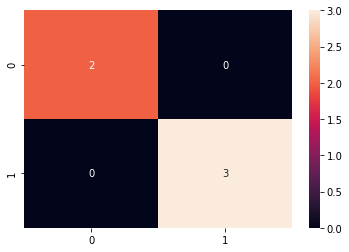

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test,y_prd)
sns.heatmap(cm,annot = True, fmt = 'd')

# Step6:Visualizing training & testing results

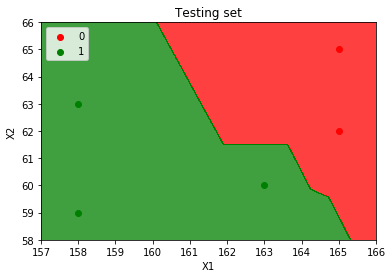

In [31]:
#Visualizing the testing set result
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1,stop = X_set[:,0].max() + 1,step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1,stop = X_set[:,1].max() + 1,step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('Testing set')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

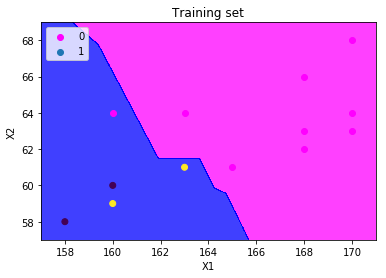

In [32]:
#Visualizing the training set result
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1,stop = X_set[:,0].max() + 1,step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1,stop = X_set[:,1].max() + 1,step = 0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('magenta','blue')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set == j, 1],
               c = ListedColormap(('magenta','blue'))(i), label = j)
plt.title('Training set')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()